In [15]:
# ==========================================
# customer_data clusterring
# ==========================================
# - 顧客クラスタリング分析
# ------------------------------------------
# Author : kokoyugura
# Date   : 2025-11
# Env    : Python 3.10+, openpyxl, pandas
# ==========================================

In [16]:
# === ライブラリ ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['axes.unicode_minus'] = False

In [17]:
# === 設定 ===
ROOT = Path.cwd()
DATA_PATH = ROOT / "output" / "rfm_result.xlsx"  # RFM結果を使う
OUTPUT_DIR = ROOT / "output"
OUTPUT_DIR.mkdir(exist_ok=True)

#以下、公開用のためコメントアウト
#print("参照データ：", DATA_PATH)
print("参照データ：customer_data.csv")

参照データ：customer_data.csv


✅ RFMデータ読込完了
  CustomerID  Recency  Frequency      Monetary  R_Score  F_Score  M_Score  \
0      C0001        9         26  14169.230769        3        3        2   
1      C0002       18         32  13846.875000        2        5        1   
2      C0003       29         17  18352.941176        1        1        5   
3      C0004       20         29  16700.000000        1        4        4   
4      C0005        9         30  15530.000000        3        5        3   

   Total_Score Segment  
0            8    一般顧客  
1            8    一般顧客  
2            7    一般顧客  
3            9    一般顧客  
4           11   リピーター  


C:\Users\7102581\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\7102581\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\7102581\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\7102581\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:14

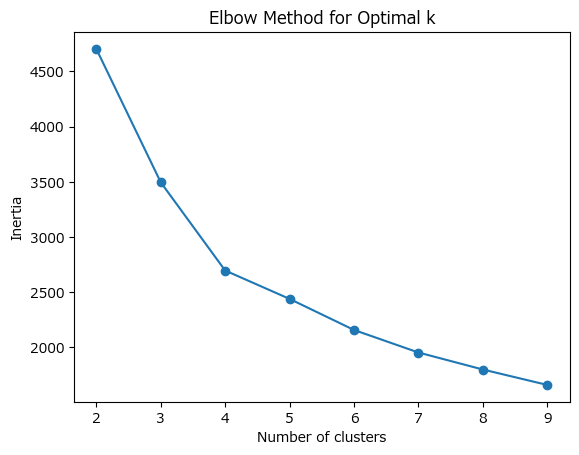

In [18]:
# === データ読み込み ===
rfm = pd.read_excel(DATA_PATH)
print("✅ RFMデータ読込完了")
print(rfm.head())

# === 特徴量抽出 ===
X = rfm[["Recency", "Frequency", "Monetary"]].copy()

# === スケーリング ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === クラスタ数を決める（エルボー法） ===
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [19]:
# === クラスタリング実行（今回は例として4分類） ===
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
rfm["Cluster"] = kmeans.fit_predict(X_scaled)

# === クラスタ特徴を要約 ===
cluster_summary = (
    rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]]
    .mean()
    .round(1)
    .reset_index()
)

print("\n✅ クラスタ特徴:")
print(cluster_summary)

# === Export ===
out_path = OUTPUT_DIR / "rfm_cluster_result.xlsx"
rfm.to_excel(out_path, index=False)

#print("\n📦 出力完了：", out_path)
print("📦 出力ファイル:output")

C:\Users\7102581\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(



✅ クラスタ特徴:
   Cluster  Recency  Frequency  Monetary
0        0      8.8       22.8   16979.6
1        1     38.7       22.2   15723.2
2        2     10.4       22.8   13809.8
3        3      8.3       30.7   15349.8
📦 出力ファイル:output


In [14]:
#各クラスターの人数比率
rfm["Cluster"].value_counts(normalize=True)

Cluster
0    0.329
3    0.288
2    0.273
1    0.110
Name: proportion, dtype: float64